# Introduction

This notebook provides a second example based on the [May 10, 2018 talk by Ed Rogers](https://github.com/adamrossnelson/pandas_presentation/blob/master/pandas_talk.ipynb). Ed's example(s) used [bike path data from Montreal Canaada](https://raw.githubusercontent.com/jvns/pandas-cookbook/v0.1/data/bikes.csv). 

This notebook follows uses [data published by Stata Corp](https://www.stata-press.com/data/r15/ts.html) (`urates.dta`).

## Diving In

This data is panel data but it is organized in wide format. It consists of 312 monthly observations. Each observation includes reports the month in a `t` variable and then data for six states:

```
              storage   display 
variable name   type    format  
--------------------------------
t               int     %tm                   
tenn            float   %9.0g                 
missouri        float   %9.0g                 
kentucky        float   %9.0g                 
indiana         float   %9.0g                 
illinois        float   %9.0g                 
arkansas        float   %9.0g   

```

This data source has been used to create a [pandas-Stata/Stata-pandas crosswalk](https://github.com/adamrossnelson/StataQuickReference/blob/master/spcrosswlk.md).

## Setup / Get Data

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib
%matplotlib inline

In [2]:
# Read data from online
rates_df = pd.read_stata('http://www.stata-press.com/data/r15/urates.dta', index_col='t')
# Display first few observations
rates_df.head()

,tenn,missouri,kentucky,indiana,illinois,arkansas
t,,,,,,
1978-01-01,5.9,5.7,5.1,5.9,6.6,6.6
1978-02-01,5.9,5.8,5.1,6.0,6.5,6.6
1978-03-01,6.1,5.6,5.1,6.0,6.4,6.4
1978-04-01,5.9,5.1,5.1,5.7,6.0,6.1
1978-05-01,5.8,4.6,5.2,5.5,6.1,6.2


In [4]:
# Quickly explore statistics
rates_df.describe()

,tenn,missouri,kentucky,indiana,illinois,arkansas
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,6.339743,5.781088,6.867947,6.106730,6.865063,6.833977
std,2.075309,1.591313,2.029191,2.413917,1.965564,1.676966
min,3.700000,2.900000,3.800000,2.800000,4.100000,4.200000
25%,5.000000,4.600000,5.400000,4.600000,5.300000,5.400000
50%,5.700000,5.600000,6.000000,5.400000,6.500000,6.700000
75%,7.500000,6.500000,8.525000,6.925000,8.200000,8.225000
max,12.800000,10.600000,12.600000,12.700000,12.900000,10.500000


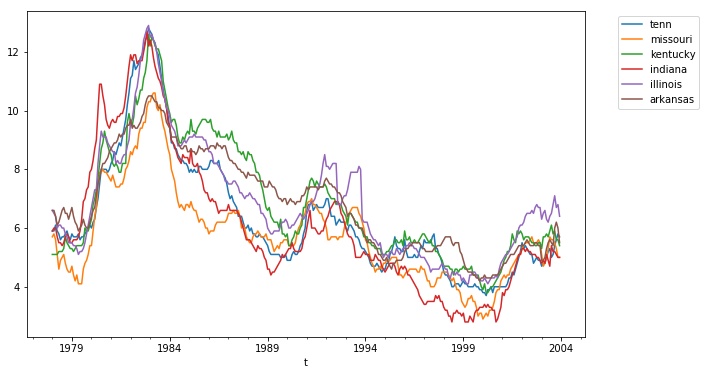

In [3]:
# Basic plot.
rates_df.plot(figsize=(10,6)).legend(bbox_to_anchor=(1.05, 1), loc=2);

## Compute new columns

In [5]:
rates_df['IN_IL'] = rates_df['indiana'] + rates_df['illinois']
rates_df.head()

,tenn,missouri,kentucky,indiana,illinois,arkansas,IN_IL
t,,,,,,,
1978-01-01,5.9,5.7,5.1,5.9,6.6,6.6,12.5
1978-02-01,5.9,5.8,5.1,6.0,6.5,6.6,12.5
1978-03-01,6.1,5.6,5.1,6.0,6.4,6.4,12.4
1978-04-01,5.9,5.1,5.1,5.7,6.0,6.1,11.7
1978-05-01,5.8,4.6,5.2,5.5,6.1,6.2,11.6


In [6]:
del rates_df['IN_IL']

## Advanced column computation

In [7]:
# Define a funtion to apply on each column.
def normalize(a):
    try:
        # If computation is possible (a needs to be number and a.std() needs to be nonzero)
        return(a - a.mean())/a.std()
    except:
        # If not computable return null (np.nan)
        return(np.nan)

rates_df.apply(normalize).head()

,tenn,missouri,kentucky,indiana,illinois,arkansas
t,,,,,,
1978-01-01,-0.211893,-0.050957,-0.871257,-0.085641,-0.134854,-0.139524
1978-02-01,-0.211893,0.011884,-0.871257,-0.044214,-0.185730,-0.139524
1978-03-01,-0.115521,-0.113798,-0.871257,-0.044214,-0.236605,-0.258787
1978-04-01,-0.211893,-0.428004,-0.871257,-0.168494,-0.440109,-0.437681
1978-05-01,-0.260078,-0.742210,-0.821976,-0.251347,-0.389234,-0.378050


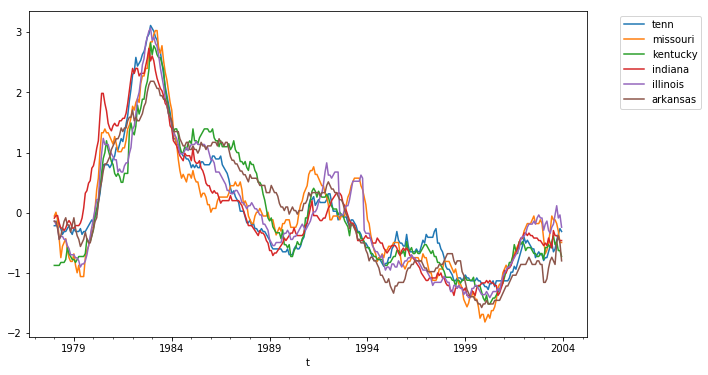

In [10]:
rates_df.apply(normalize).plot(figsize=(10,6)).legend(bbox_to_anchor=(1.05, 1), loc=2);

In [14]:
rates_df.index

DatetimeIndex(['1978-01-01', '1978-02-01', '1978-03-01', '1978-04-01',
               '1978-05-01', '1978-06-01', '1978-07-01', '1978-08-01',
               '1978-09-01', '1978-10-01',
               ...
               '2003-03-01', '2003-04-01', '2003-05-01', '2003-06-01',
               '2003-07-01', '2003-08-01', '2003-09-01', '2003-10-01',
               '2003-11-01', '2003-12-01'],
              dtype='datetime64[ns]', name='t', length=312, freq='MS')

## Split: aka "GroupBy"

### Create somthing to group by

In [25]:
season_map = {1: 'Winter', 2: 'Winter', 3: 'Winter', 4: 'Winter', 5:'Summer', 6: 'Summer',
              7: 'Summer', 8: 'Summer', 9: 'Summer', 10: 'Winter', 11:'Winter', 12:'Winter'}
rates_df['Season'] = rates_df.index.month
rates_df['Season'] = rates_df['Season'].map(season_map)
rates_df.head()

,tenn,missouri,kentucky,indiana,illinois,arkansas,Season
t,,,,,,,
1978-01-01,5.9,5.7,5.1,5.9,6.6,6.6,Winter
1978-02-01,5.9,5.8,5.1,6.0,6.5,6.6,Winter
1978-03-01,6.1,5.6,5.1,6.0,6.4,6.4,Winter
1978-04-01,5.9,5.1,5.1,5.7,6.0,6.1,Winter
1978-05-01,5.8,4.6,5.2,5.5,6.1,6.2,Summer


### Group by season

In [28]:
rates_df_grpby_season = rates_df.groupby('Season', sort=False)
rates_df_grpby_season.get_group('Winter').head()

,tenn,missouri,kentucky,indiana,illinois,arkansas,Season
t,,,,,,,
1978-01-01,5.9,5.7,5.1,5.9,6.6,6.6,Winter
1978-02-01,5.9,5.8,5.1,6.0,6.5,6.6,Winter
1978-03-01,6.1,5.6,5.1,6.0,6.4,6.4,Winter
1978-04-01,5.9,5.1,5.1,5.7,6.0,6.1,Winter
1978-10-01,5.9,4.6,5.5,5.8,5.7,6.5,Winter


In [29]:
rates_df_grpby_season.get_group('Summer').head()

,tenn,missouri,kentucky,indiana,illinois,arkansas,Season
t,,,,,,,
1978-05-01,5.8,4.6,5.2,5.5,6.1,6.2,Summer
1978-06-01,5.6,4.9,5.2,5.5,6.1,6.4,Summer
1978-07-01,5.7,5.0,5.2,5.4,6.0,6.6,Summer
1978-08-01,5.7,5.1,5.3,5.5,6.0,6.7,Summer
1978-09-01,5.8,4.8,5.7,5.7,5.8,6.5,Summer


In [34]:
rates_df_grpby_season['arkansas'].describe()

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
Winter,182.0,6.836266,1.692918,4.2,5.4,6.65,8.300,10.5
Summer,130.0,6.830772,1.660898,4.3,5.4,6.75,8.175,10.3


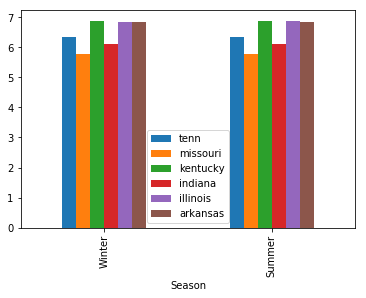

In [35]:
rates_df_grpby_season.mean().plot(kind='bar');

### Transformation

In [38]:
def subtract_mean(s):
    return s-s.mean()

rates_df['month'] = rates_df.index.month
rates_df.groupby('month').transform(subtract_mean).head()

,tenn,missouri,kentucky,indiana,illinois,arkansas
t,,,,,,
1978-01-01,-0.484615,-0.088462,-1.750000,-0.246154,-0.234615,-0.265384
1978-02-01,-0.438462,0.026923,-1.761539,-0.142308,-0.346154,-0.234615
1978-03-01,-0.257692,-0.165384,-1.757692,-0.126923,-0.453846,-0.423078
1978-04-01,-0.434616,-0.673077,-1.792308,-0.400000,-0.823077,-0.719231
1978-05-01,-0.534615,-1.130769,-1.657692,-0.596154,-0.749999,-0.619231


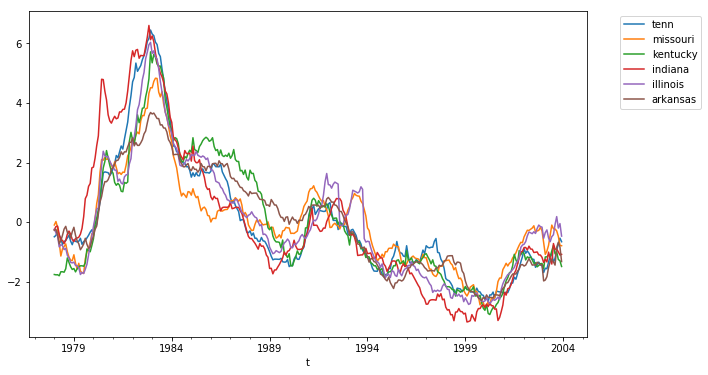

In [44]:
rates_df.groupby('month').transform(subtract_mean).plot(figsize=(10,6)).legend(bbox_to_anchor=(1.05, 1), loc=2);

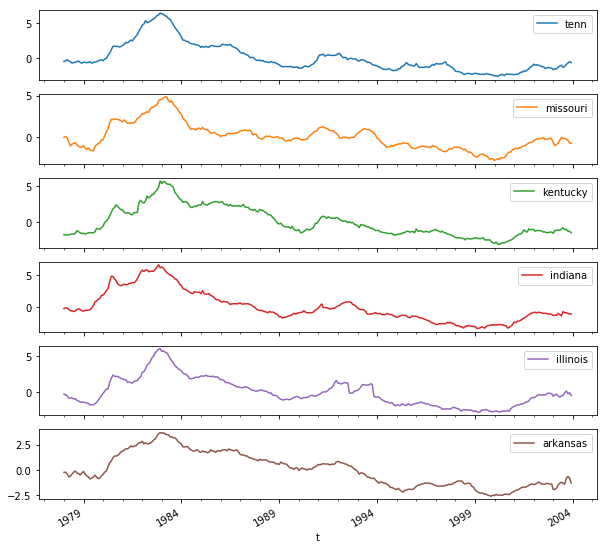

In [47]:
rates_df.groupby('month').transform(subtract_mean).plot(figsize=(10,10), subplots=True);

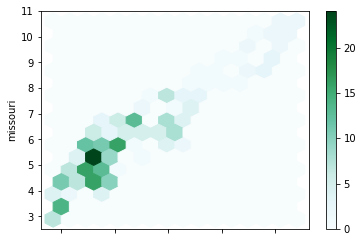

In [49]:
# rates_df[['kentucky','missouri']].plot.hexbin()
rates_df.plot.hexbin('tenn','missouri', gridsize=15)